## Introduction



Our data source is the Caltech-UCSD Birds-200-2011 Dataset (CUB_200_2011). This dataset was the most used bird classification dataset before the newer, but larger dataset, NABirds. Therefore, we knew this dataset was still a credible and large enough source for our required data. We started our analysis by choosing 10 different bird pairs from the data, which were strategically chosen. We chose these specific birds because of their differences in color, body shape and size, beak size, leg size, and even how they sat on branches. 

##### 189 vs 188 (Red bellied woodpecker vs pileated woodpecker) (medium)
The pileated woodpecker and the red bellied woodpecker are both in the category of woodpecker birds. Pileated woodpecker seems slightly bigger than the red bellied woodpecker. Both kinds of birds are mostly attached to the tree horizontally. The colors for both birds are the same - they consist of red, black and white.

##### 162 vs 183 (Canada Warbler vs Northern Waterthrush) (easy)
Canada warbler is a tiny, yellow bird with white ring around its eyes, and northern waterthrush is a gray  / brown shade of tiny birds with white/brown dot patterns on their stomach. They’re both small birds with short beaks, and mostly on tree branches (in the images).

##### 101 vs 053 (White Pelican vs Western Grebe) (medium)
White pelican and western grebe are quite similar to each other. Their bodies both have an S-shape with long speculum. However, the speculum of white pelican is proportionally bigger and longer compared to that of western grebe. The clearest distinguishing feature between the birds is their body  color. White pelican is very white, while western grebe has black body, black forehead and white neck.

##### 140 vs 139 (Summer Tanager vs Scarlet Tanager) (hard)
Both of these birds are dominantly red birds in the Tanager category (easily seen). Both of these birds have small beaks, legs, and body types(easily seen). They both only contain the colors red and black(easily seen). The Scarlet Tanager has completely black wings whereas the Summer Tanager has mainly red wings with a faded black at the end(medium-hard to see). 

##### 70 vs 79 (Green Violetear vs Belted Kingfisher) (easy)
These two birds have no colors in common and are in different categories of bird. The Green Violetear is black, blue, purple, and green whereas the Belted Kingfisher is gray, white, and brown(easily seen). Both birds have full black eyes and tend to sit on horizontal branches(medium to see). Both of these birds have smaller body types with narrow and medium length beaks(easy to see).

##### 83 vs 15 (White Breasted Kingfisher vs Lazuli Bunting) (easy)
Both of these birds have the colors blue and a reddish brown on their tummy(medium to see). But, the White Breasted Kingfisher had a red head and beak and the Lazuli Bunting had a blue head and a black beak. The birds both have medium to small body types and short legs. The Kingfisher is shorter and more round where the Bunting is more long and skinny. 

##### 89 vs 87 (Hooded Merganser vs Mallard) (medium)
Mallard - green head
Hooded merganser - white with black hood
Both live on water (in images) and similar size

#####   059 vs 141 (California Gull vs Arctic Tern) (hard)
California Gull - White body with dark gray-ish wings 
Arctic Tern - white body with black cap on head
California gulls seem to be bigger than Arctic terns. 

##### 001 vs 003 (Black footed albatross vs Sooty Albatross) (hard)
Both are in the albatross family - size looks similar / very similar feet shape.
Black footed albatross - whole body part is black/gray
Sooty albatross - white ring around eyes, whole body part is dark gray. 

##### 049 vs 061 (Boat tailed grackle vs Heermann Gull) (easy)

Those two birds are totally different. The boat tailed grackle(049) is totally black with a long tail. It is easy to find on trees, while for heermann gull(061), it is more likely to appear near water. It is a sea gull. Sea gulls usually have two feets and white and black color. 


## Data Exploration

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Code & Results


In [2]:
# a function return all the performance scores as many lists
def classificationtool(path):
    model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x200 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 
    tf.keras.layers.Dense(1, activation='sigmoid')])
    
    training_set = tf.keras.utils.image_dataset_from_directory(
      path,
      seed=123,
      image_size=(200, 200),
      subset='training',
      validation_split=0.3,
      batch_size=5)
    validation_set = tf.keras.utils.image_dataset_from_directory(
      path,
      shuffle=True,
      seed=17,
      image_size=(200, 200),
      validation_split=0.3,
      subset='validation',
      batch_size=5)
    holdout_set_all = tf.keras.utils.image_dataset_from_directory(
      path,
      shuffle=False,
      seed=17,
      image_size=(200, 200),
      batch_size=1) # batch size has to be one for this set

    train_file_paths = training_set.file_paths
    validation_file_paths = validation_set.file_paths
    holdout_file_paths = holdout_set_all.file_paths
    
    RMSprop = tf.keras.dtensor.experimental.optimizers.RMSprop
    # could also use Adam here 
    model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
    
    images = []
    labels = []
    for e, image_label in enumerate(holdout_set_all):
        f = holdout_file_paths[e]
        if f in validation_file_paths:
            images.append(image_label[0].numpy())
            labels.append(image_label[1].numpy())
    history = model.fit(training_set,
      epochs=9,
      verbose=1,
      validation_data = validation_set)
    
    img_arrays = []
    for i in images:
        img_arrays.append(i)

    test_dataset = tf.data.Dataset.from_tensor_slices(img_arrays)
    preds = model.predict(test_dataset)
    
    df = pd.DataFrame()
    df['true_label'] = [i[0] for i in labels]
    df['predict_probability'] = [i[0] for i in preds]
    df = df.sort_values(by='predict_probability')
    c = Counter([i[0] for i in labels])
    inferred_labels = [0 for i in range(c[0])] + [1 for i in range(c[1])]
    df['predicted_label'] = inferred_labels 
    df['compare'] = df['true_label'] == df['predicted_label']
    df2 = df.groupby(['true_label', 'compare']).count()
    
    #accuracy
    Accuracy = len(df.loc[df['compare'] == True])/len(df)

    #confusion matrix
    values = list(df2['predict_probability'])
    
    array = []
    array.append([values[3], values[2]])
    array.append([values[0], values[1]])
    array = np.array(array)

    #precision and recall scores
    precision_0 = values[1]/ (values[1] + values[0])
    precision_1 = values[3]/ (values[2] + values[3])
    recall_0 = values[1]/(values[1] + values[2])
    recall_1 = values[3]/(values[3] + values[0])
    
    return model, Accuracy, array, precision_0, precision_1, recall_0, recall_1

In [3]:
# create paths
pwd_add = os.getcwd()
path1 = pwd_add + '/Compare1'
path2 = pwd_add + '/Compare2'
path3 = pwd_add + '/Compare3'
path4 = pwd_add + '/Compare4'
path5 = pwd_add + '/Compare5'
path6 = pwd_add + '/Compare6'
path7= pwd_add + '/Compare7'
path8 = pwd_add + '/Compare8'
path9 = pwd_add + '/Compare9'
path10 = pwd_add + '/Compare10'

In [4]:
#lists for models result
mod_list = []
accuracy_list = []
cm_list = []
precision_0_list = []
precision_1_list = []
recall_0_list = []
recall_1_list = []

#loop through models and append the results
path_list = [path1, path2, path3, path4, path5, path6, path7, path8, path9, path10]

for path in path_list:
    mod, acc, cm, prec_0, prec_1, recall_0, recall_1 = classificationtool(path)
    mod_list.append(mod)
    accuracy_list.append(acc)
    cm_list.append(cm)
    precision_0_list.append(prec_0)
    precision_1_list.append(prec_1)
    recall_0_list.append(recall_0)
    recall_1_list.append(recall_1)
    

2022-11-17 19:25:37.770537: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 120 files belonging to 2 classes.
Using 84 files for training.
Found 120 files belonging to 2 classes.
Using 36 files for validation.
Found 120 files belonging to 2 classes.
Epoch 1/9
17/17 [==============================] - 4s 147ms/step - loss: 545.1627 - recall: 0.4324 - precision: 0.4706 - val_loss: 2.8112 - val_recall: 1.0000 - val_precision: 0.4444
Epoch 2/9
17/17 [==============================] - 2s 142ms/step - loss: 6.4288 - recall: 0.5405 - precision: 0.5000 - val_loss: 0.6597 - val_recall: 0.6875 - val_precision: 0.5500
Epoch 3/9
17/17 [==============================] - 3s 148ms/step - loss: 2.5251 - recall: 0.5135 - precision: 0.5429 - val_loss: 0.6161 - val_recall: 0.8125 - val_precision: 0.6842
Epoch 4/9
17/17 [==============================] - 2s 138ms/step - loss: 1.1612 - recall: 0.5946 - precision: 0.6875 - val_loss: 0.6502 - val_recall: 0.9375 - val_precision: 0.6250
Epoch 5/9
17/17 [==============================] - 2s 126ms/step - loss: 0.8879 - recall: 0.75

Epoch 3/9
17/17 [==============================] - 2s 132ms/step - loss: 2.2452 - recall_4: 0.6216 - precision_4: 0.5750 - val_loss: 0.5554 - val_recall_4: 0.8750 - val_precision_4: 0.6667
Epoch 4/9
17/17 [==============================] - 2s 131ms/step - loss: 1.1364 - recall_4: 0.7297 - precision_4: 0.7297 - val_loss: 0.5223 - val_recall_4: 0.5625 - val_precision_4: 0.8182
Epoch 5/9
17/17 [==============================] - 2s 141ms/step - loss: 1.6683 - recall_4: 0.7297 - precision_4: 0.7105 - val_loss: 0.7021 - val_recall_4: 0.5625 - val_precision_4: 0.6923
Epoch 6/9
17/17 [==============================] - 2s 134ms/step - loss: 2.7926 - recall_4: 0.6216 - precision_4: 0.6216 - val_loss: 0.5247 - val_recall_4: 0.6250 - val_precision_4: 0.7143
Epoch 7/9
17/17 [==============================] - 2s 133ms/step - loss: 0.9050 - recall_4: 0.7568 - precision_4: 0.6829 - val_loss: 0.3759 - val_recall_4: 0.9375 - val_precision_4: 0.8824
Epoch 8/9
17/17 [==============================] - 2s 1

In [5]:
ModelPerformance = pd.DataFrame()
Modellist = ["Model-189vs188", "Model-162vs183", "Model-101vs053","Model-140vs139","Model-70vs79",
             "Model-83vs15", "Model-89vs87", "Model-059vs141","Model-001vs003","Model-049vs061"]
ModelPerformance["Model"] = Modellist
ModelPerformance["Accuracy Rate"] = accuracy_list
ModelPerformance["Precision0"] = precision_0_list
ModelPerformance["Precision1"] = precision_1_list
ModelPerformance["Recall0"] = recall_0_list
ModelPerformance["Recall1"] = recall_1_list
ModelPerformance

,Model,Accuracy Rate,Precision0,Precision1,Recall0,Recall1
0,Model-189vs188,0.777778,0.800000,0.750000,0.800000,0.750000
1,Model-162vs183,0.277778,0.350000,0.187500,0.350000,0.187500
2,Model-101vs053,0.818182,0.863636,0.727273,0.863636,0.727273
3,Model-140vs139,0.722222,0.750000,0.687500,0.750000,0.687500
4,Model-70vs79,0.777778,0.800000,0.750000,0.800000,0.750000
5,Model-83vs15,0.828571,0.850000,0.800000,0.850000,0.800000
6,Model-89vs87,0.833333,0.850000,0.812500,0.850000,0.812500
7,Model-059vs141,0.428571,0.500000,0.333333,0.500000,0.333333
8,Model-001vs003,0.657143,0.700000,0.600000,0.700000,0.600000
9,Model-049vs061,0.777778,0.800000,0.750000,0.800000,0.750000


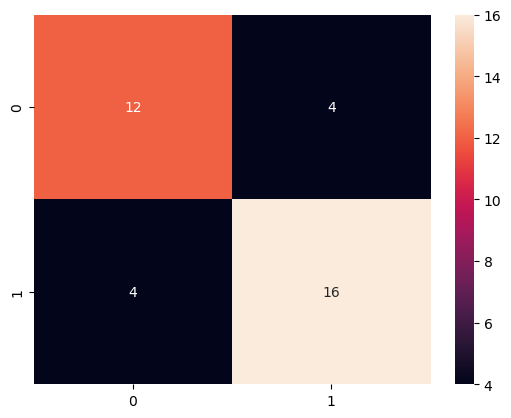

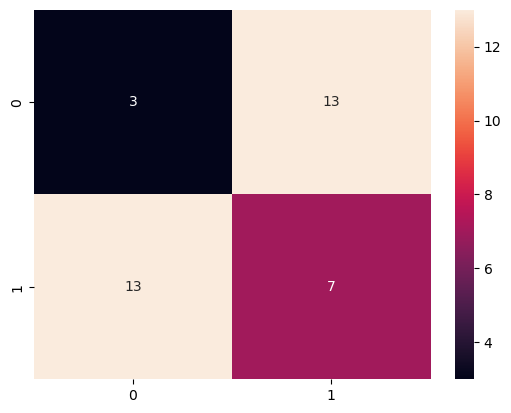

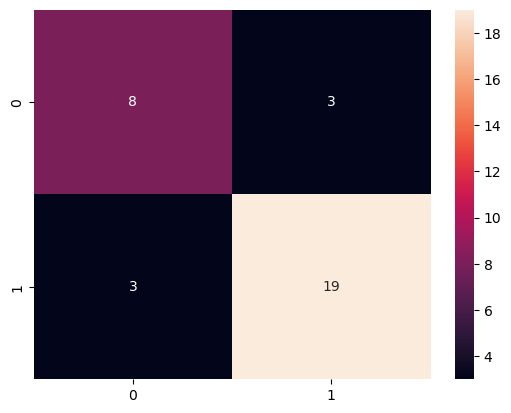

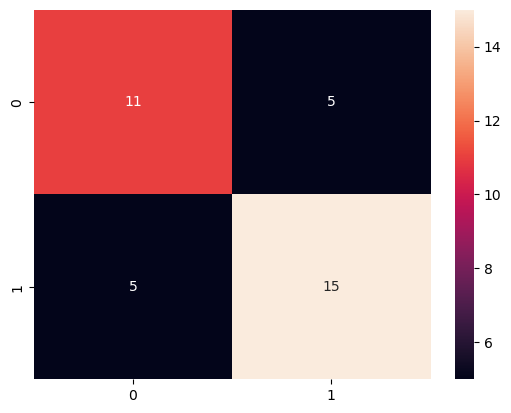

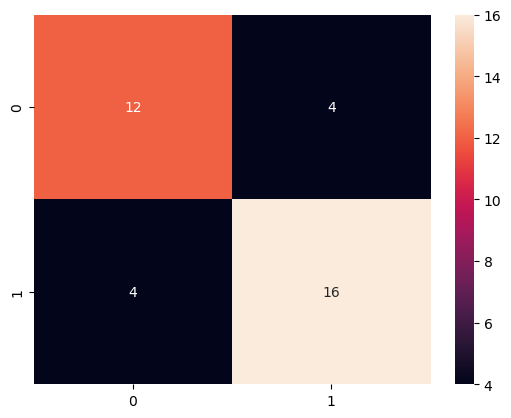

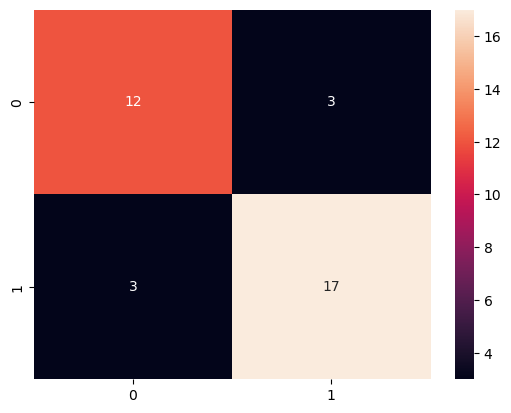

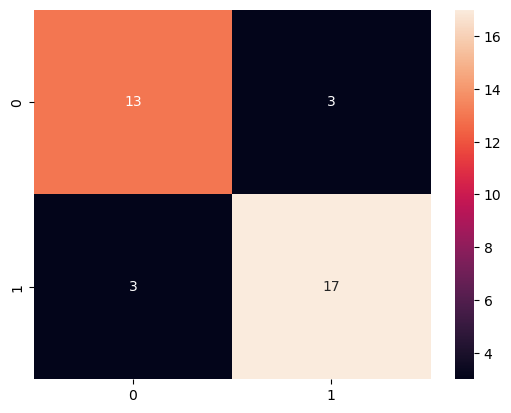

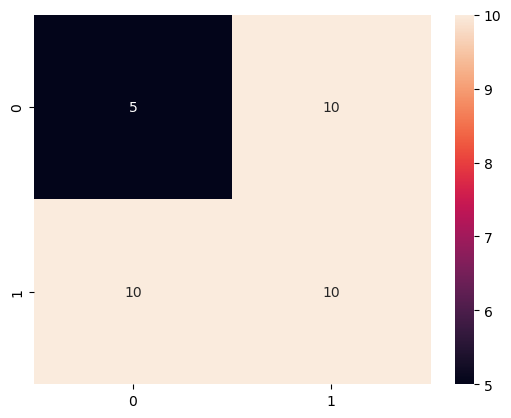

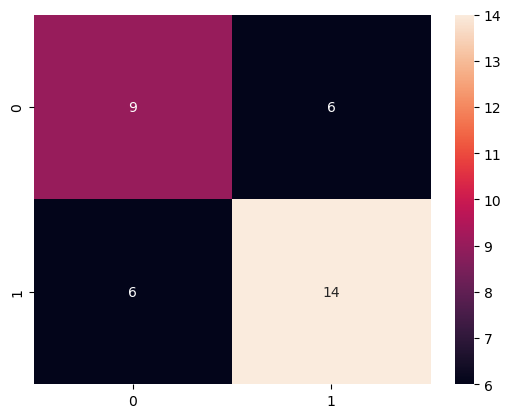

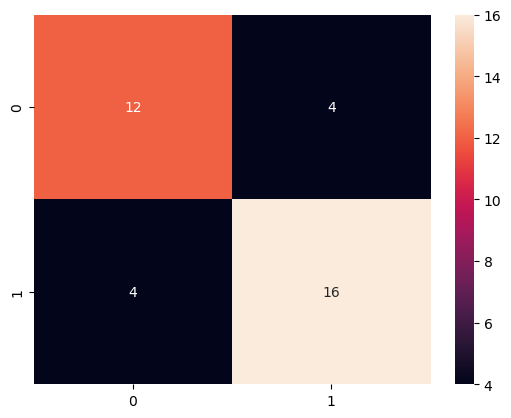

In [11]:
# Show all the confusion matrix
for i in cm_list:
    plt.figure()
    plt.tight_layout()
    sns.heatmap(i, annot=True)

### Novel Specics
Now we try to see how those 10 models trained on different pairs of birds perform on bird no. 200 (Yellowthroat)

In [12]:
path = pwd_add + '/200'
yellowthroat = tf.keras.utils.image_dataset_from_directory(
      path,
      shuffle=False,
      seed=17,
      image_size=(200, 200),
      batch_size=1) # batch size has to be one for this set

images = []
labels = []
for e, image_label in enumerate(yellowthroat):
    images.append(image_label[0].numpy())
    labels.append(image_label[1].numpy())
len(images), len(labels)    #60 60

#get list of probabilities for each model
test_dataset_200 = tf.data.Dataset.from_tensor_slices(images)

Found 60 files belonging to 1 classes.


In [13]:
#df bird no. 200 to 10 models
df_200 = pd.DataFrame()

image_list_name = []
for i in range(len(images)):
    a = i+1
    image_list_name.append('Yellowthoat ' + str(a))
df_200['Image'] = image_list_name

#probabilities through 10 models
preds = mod.predict(test_dataset_200)

for e, i in enumerate(mod_list):
    preds = i.predict(test_dataset_200)
    
    df_col_name = 'mod ' + str(e+1) + ' Probability'
    df_200[df_col_name] = preds

df_200.head(10)

60/60 [==============================] - 1s 10ms/step


,Image,mod 1 Probability,mod 2 Probability,mod 3 Probability,mod 4 Probability,mod 5 Probability,mod 6 Probability,mod 7 Probability,mod 8 Probability,mod 9 Probability,mod 10 Probability
0,Yellowthoat 1,0.509593,0.488806,0.521226,0.533664,0.482292,0.486724,0.478705,0.515265,0.495079,0.482534
1,Yellowthoat 2,0.511383,0.488806,0.521226,0.544231,0.482752,0.446482,0.478705,0.515265,0.438552,0.495120
2,Yellowthoat 3,0.510903,0.488806,0.521226,0.533482,0.484447,0.456568,0.478705,0.515265,0.476724,0.504177
3,Yellowthoat 4,0.543526,0.488806,0.521226,0.359478,0.484447,0.599371,0.466370,0.515265,0.536656,0.526430
4,Yellowthoat 5,0.530046,0.420229,0.584940,0.753438,0.567117,0.052448,0.442958,0.543271,0.486386,0.818510
5,Yellowthoat 6,0.733500,0.488806,0.521332,0.189552,0.484154,0.285256,0.478705,0.515265,0.320043,0.587274
6,Yellowthoat 7,0.406732,0.486802,0.652395,0.197708,0.463295,0.004397,0.859446,0.530948,0.816534,0.468823
7,Yellowthoat 8,0.414948,0.499825,0.521226,0.488301,0.466030,0.478062,0.478705,0.515265,0.593123,0.465124
8,Yellowthoat 9,0.510258,0.488806,0.521226,0.324467,0.484447,0.757940,0.478705,0.515265,0.453853,0.492796
9,Yellowthoat 10,0.530393,0.488806,0.521226,0.546931,0.484447,0.299667,0.478705,0.515265,0.526457,0.526792


Now, we will use 10 models above to predict bird no. 13 (Bobolink)

In [30]:
#prep data set for bobolink
path = pwd_add + '/13'
bobolink = tf.keras.utils.image_dataset_from_directory(
      path,
      shuffle=False,
      seed=17,
      image_size=(200, 200),
      batch_size=1) # batch size has to be one for this set

images = []
labels = []
for e, image_label in enumerate(bobolink):
    images.append(image_label[0].numpy())
    labels.append(image_label[1].numpy())

#get list of probabilities for each model
test_dataset_13 = tf.data.Dataset.from_tensor_slices(images)

Found 60 files belonging to 1 classes.


In [31]:
#df bird no. 13 to 10 models
df_13 = pd.DataFrame()

image_list_name = []
for i in range(len(images)):
    a = i+1
    image_list_name.append('Bobolink ' + str(a))
df_13['Image'] = image_list_name

#probabilities through 10 models
preds = mod.predict(test_dataset_13)

for e, i in enumerate(mod_list):
    preds = i.predict(test_dataset_13)
    
    df_col_name = 'mod ' + str(e+1) + ' Probability'
    df_13[df_col_name] = preds

df_13.head(10)

60/60 [==============================] - 1s 10ms/step


,Image,mod 1 Probability,mod 2 Probability,mod 3 Probability,mod 4 Probability,mod 5 Probability,mod 6 Probability,mod 7 Probability,mod 8 Probability,mod 9 Probability,mod 10 Probability
0,Bobolink 1,0.013735,0.489174,0.042692,0.089329,0.519728,0.953115,0.799398,0.158687,0.645302,9.637491e-12
1,Bobolink 2,0.575052,0.506871,0.497566,0.436310,0.611673,0.445534,0.588936,0.513226,0.358479,5.269688e-03
2,Bobolink 3,0.528599,0.538176,0.547821,0.475174,0.768903,0.451084,0.561971,0.513226,0.699449,6.322474e-01
3,Bobolink 4,0.117257,0.507601,0.628983,0.007134,0.076951,0.951826,0.979771,0.348530,0.008188,3.724518e-07
4,Bobolink 5,0.705017,0.510198,0.471209,0.108296,0.457319,0.527177,0.652050,0.513226,0.462061,1.487910e-09
5,Bobolink 6,0.471201,0.512650,0.496730,0.027151,0.499918,0.737071,0.524766,0.529622,0.491822,2.698873e-01
6,Bobolink 7,0.526474,0.506871,0.496730,0.516221,0.499918,0.515204,0.510219,0.513226,0.503809,3.178023e-02
7,Bobolink 8,0.349271,0.499870,0.539250,0.159586,0.681152,0.513145,0.848182,0.513226,0.366073,6.086877e-02
8,Bobolink 9,0.527296,0.506871,0.496730,0.506631,0.534606,0.515147,0.434156,0.513226,0.363490,1.813481e-01
9,Bobolink 10,0.125002,0.586061,0.632425,0.012774,0.339444,0.837298,0.749468,0.443609,0.771515,1.050890e-07


Having the probabilities of running the 10 models on images of bird no. 200 and bird no. 13, I will build a classifier to classify images of those two novel species.

In [32]:
#create labels
labels_binary = []

for i in range(len(df_200['Image'])):
    labels_binary.append(0)

for i in range(len(df_13['Image'])):
    labels_binary.append(1)

In [33]:
#put two dfs on each other
x_model = pd.concat([df_200, df_13])
x_model.drop('Image', axis=1, inplace=True)

x_model.head(10)

,mod 1 Probability,mod 2 Probability,mod 3 Probability,mod 4 Probability,mod 5 Probability,mod 6 Probability,mod 7 Probability,mod 8 Probability,mod 9 Probability,mod 10 Probability
0,0.528179,0.506871,0.496730,0.506631,0.499918,0.353437,0.501076,0.513226,0.597124,0.641262
1,0.531300,0.506871,0.496730,0.506191,0.499918,0.617682,0.403039,0.513226,0.482645,0.630258
2,0.528179,0.506871,0.496730,0.506631,0.591946,0.603286,0.484385,0.513226,0.499136,0.464324
3,0.503829,0.539275,0.496730,0.509735,0.504606,1.000000,0.515638,0.513226,0.351271,0.054391
4,0.701434,0.636139,0.538214,0.194554,0.456871,0.973777,0.158755,0.502179,0.085574,0.000079
5,0.576060,0.506871,0.496730,0.431627,0.166102,0.924509,0.449550,0.513226,0.323056,0.611959
6,0.347051,0.467409,0.742504,0.270840,0.471250,0.956956,0.226263,0.514309,0.007731,0.004228
7,0.502028,0.508068,0.496730,0.492252,0.501993,0.936207,0.473445,0.518018,0.594075,0.818079
8,0.519612,0.506871,0.476746,0.503990,0.499918,0.578206,0.490738,0.513226,0.458932,0.153230
9,0.517704,0.506871,0.496730,0.464690,0.488943,0.994568,0.483498,0.513226,0.489529,0.169490


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_model, labels_binary , test_size=0.3, random_state=1)


**Let's try Decision Tree Classifier!**

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',random_state=100)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
predict_probs = dt.predict_proba(X_test)

In [36]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.76      0.76      0.76        21

    accuracy                           0.72        36
   macro avg       0.71      0.71      0.71        36
weighted avg       0.72      0.72      0.72        36



It gave a low precision and recall scores in decision tree model. All the numbers are around 70%. 

**Let's try Logistic Regression Classifier!**

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', random_state=11).fit(X_train, y_train)
predictions = lr.predict(X_test)
predict_probs = lr.predict_proba(X_test)

In [38]:
#classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.90      0.86      0.88        21

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36



It is the best model among all three. The difference between F-1 scores are small, which means the model predict in a general good way. 

**Let's try KNN Classifier!**

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 4  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
predictions = neigh.predict(X_test)

In [40]:
#classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80        15
           1       0.94      0.71      0.81        21

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.81        36



The precision for the 0 class is lower. And the recall for the class 1 is lower which are about 70%. The F-1 score is about 80%. 

## Interpretation

1. 189 vs 188 (Red Bellied Woodpecker vs Pileated Woodpecker)

The accuracy rate of this comparison of two birds is 0.777778. Both birds are woodpeckers, and they have a very similar body shape with similar colors. However, they’re body colors are different because one is black/white mixed and the other is black. Our hypothesis was that this comparison is going to be medium level so that the score is going to be somewhere in between 50% and 100%. The accuracy is 77% which means the model was almost easily able to tell the difference between the two birds.

2. 162 vs 183 (Canada Warbler vs Northern Waterthrush)

The accuracy rate of this comparison of two birds is 0.277778. Our hypothesis was that this comparison is going to be easy so that the score is going to be high, since two birds have distinguishable traits with very different colors. Our hypothesis is wrong because the accuracy is 28% which means the model was not able to tell the difference between the two birds easily. We think that the reason is because those two birds have a very similar shape, and the two birds are mostly sitting on the tree branches in most of the pictures.

3. 101 vs 053 (White Pelican vs Western Grebe) 

The accuracy rate of this comparison of two birds is 0.818182. Our hypothesis was that this comparison will be medium level for our model (between 50-100 acc. score), because those two birds seem like they’re mostly on the water and have pretty similar beaks. But they have a very different color of their body. The accuracy is at 81%, which means that the model was able to tell the difference easily. We think this is because of the shade of colors both birds have. One has a bright color, the other one has a very dark shade of color.

4. 140 vs 139 (Summer Tanager vs Scarlet Tanager )

The accuracy rate of this comparison of two birds is 0.722222. Our hypothesis was that this comparison will be at a hard level for our model, because both birds have a very similar color and in the same bird family. The accuracy is at 72%, which means that the model was able to tell the difference easily. We think we got this result because one has one shade of color most of the time(red), however, the other one has two different shades (black and red), and this could have helped the model to tell the difference.

5. 70 vs 79 (Green Violetear vs Belted Kingfisher) 

The accuracy rate of this comparison of two birds is 0.777778. Our hypothesis was that this comparison will be at the easy level, because these two birds have very different colors and one has a very thin shaped beak and the other has a thick shaped beak. However, our hypothesis was wrong with the accuracy score of 78%. We think that this is because both birds are mostly on the branches and the background seems very similar in most of the photos.

6. 83 vs 15 (White Breasted Kingfisher vs Lazuli Bunting)

The accuracy rate of this comparison of two birds is 0.828571. Our hypothesis was that this comparison will be easy for the model, because the general shape of the beak and body is very different for two birds. The hypothesis was correct with the accuracy of 82%. 

7. 89 vs 87 (Hooded Merganser vs Mallard)

The accuracy rate of this comparison of two birds is 0.833333. Our hypothesis was that this comparison will be at the medium level because two birds have very different colors, but it seemed like two birds are both living on the water most of the time (in the photos), so due to the background features our model will think that this comparison is harder. However, the accuracy of this comparison was at 83% which is considered high. 

8. 059 vs 141 (California Gull vs Arctic Tern)

The accuracy rate of this comparison of two birds is 0.428571. This result matches with our hypothesis as we think it should be very hard to detect. Those are two very similar types of birds with the same color of body and size. The environments they lived in are similar too, which is near the water. It is hard for the model to find some features in order to correctly label them. 

9. 001 vs 003 (Black Footed Albatross vs Sooty Albatross)

The accuracy rate of this comparison of two birds is 0.657143. Our hypothesis is it should be very hard to distinguish because they are in the same genre. Even though it is not a very high score compared with other accuracies that we had, it is still considered a high accuracy score. Our hypothesis is wrong in this case. One thought I have may be they have different mouth shapes: one is shaped and the other is dull. The algorithm may detect this difference and make it as a feature to distinguish. 

10. 049 vs 061 (Boat Tailed Grackle vs Heermann Gull)

The accuracy rate of this comparison of two birds is 0.777778. It matches with our assumption as we think it should be easy to distinguish between. Some key points to distinguish may be the environment, such as one in a tree and the other one is usually near the water. And also, the shape of the birds can be different: one showed very clear feet, while others did not have that. 


#### Discuss the precision and recall scores of each class for your various models. What seems to be your strongest model and why?


Precision and recall both showed the overall model performance. We used 0 for the first class, and 1 for the second class. And we consider the precision and recall for each class separately. The best model should have a high precision and recall for both classes and a smaller difference among two classes. All the numbers had been shown in the data frame above. Looking at the overall strength of our models (both folders (0 vs 1)), they look pretty strong due to only one of the models precision and recall scores both being under 0.35, and only two models total with both precision and recall scores below 0.50 each. To start, our weakest model was Model 2 “Model-162vs183”, which has the precision and recall scores for folder (162) at 0.35, and folder (183) at 0.187500. The two birds being looked at are the Canada Warbler vs Northern Waterthrush. The low scores can be because of several different factors and I believe that the main problem the computer had was the spots on the Waterthrushe’s stomach being scattered, and the fact that the birds tend to sit on trees in the opposite directions or even different colored trees. The model with the highest precision and recall scores (combined) in both folder 0 and 1 was model 7 “89vs87”. Folder (89) had the scores 0.85, and folder (87) had the scores 0.80. Because they are both high percentages and they are pretty close to each other, model 7 has our strongest precision and recall scores. This was not surprising to us because both of these birds, the Hooded Merganser and the Mallard, live in water. So, all, if not most of the pictures taken of them are in water.  They have easely distinct differences because their colors are plain and have pretty set cut offs. The mallard has a green head that cuts off all at the same point of the neck. The Merganser has a white and black head but the colors are very neatly assembled. Also, both of these birds have longer and bigger body types with a longer neck and beak. Therefore, we predicted that the differences would be easily seen, and we were right. 



#### Discuss the results of your novel bird species dataframe. Do the classifier scores for the novel species seem to describe that species in a patterned way? Why or why not?

We chose Yellowthroat (No. 200) as our novel species to analyze. It is a small size yellow bird, with a long tail. There are 59 birds in the folder, so we use the 10 models for each of them and get a dataframe attached above. Then, we want to understand the overall ability of the prediction, so I calculate the average per column. All the average numbers are around 50%, which matches our assumption, as Yellowthroat did not appear anywhere in our model. It is in a pattern based on the picture similarities. 50% is the natural threshold, which means if we did nothing to the model, the probability that we pick the right one should be 50%, as it is a binary situation. Model 5 gave the best prediction, that the average probability is 52.2%. Model 7 gave the worst prediction, which is 44.5% of probability. Two types of birds in model 5 are both small size birds. And Yellowthroat is small too. One of the birds from the folder is green/blue. In some pictures the color may be yellow, which matches with the Yellowthroat. For model 7, both species belong to the category of Mallard or duck, which is totally different from Yellowthroat, which is a bird on the tree often. Mallard and duck can be found in water for most of the pictures. Thus, the model can not do a good job distinguishing both classes. 


## Conclusion


In this project, we created 10 models that were able to distinguish between two types of birds. Amongst all 10 pairs, we set up the hypothesis for each pair - 4 easy comparisons, 3 medium comparisons, 3 hard comparisons. We ran the model, got the predicted label, and computed the accuracy, precision, and recall scores in order to measure the performance of each model. And we put them into the data frame shown above. The analysis of the data led to many noteworthy results. One thing that we realized was that trying to predict how well the computer would compare the birds was not as easy as we initially thought. Our predictions were off on some of the models and it shows that computers think a lot differently than humans. Some of our hypotheses did not match the results. We think one of the reasons is that the data is very limited. For each model, we only have less than 100 pictures per class put into it. It is a small size for model training. The other reason is that the bird in each image only occupied a small proportion of the overall picture. A lot of other features may be captured and trained, for example environmental factors, whether it is on trees or water may significantly change the results. 

We chose the novel species (No. 200) and put it into our ten models and analyzed the results. As it is a novel species, the accuracy rate is not expected to be high. The results match very well with our hypothesis: all the numbers are around 50%. Some of them work better than others if they have similar bird characteristics. 

We have trained and tested the novel bird species (No. 13) and used ten of our models to predict the novel species’ probability of being in either class. By using 3 different binary classifiers - decision tree, logistic regression, and KNN, we have looked at the model probability scores. Our result told us that the decision tree works the best for the classification process with the highest performance score. The weakness part may becasue of a improper method choices or not large enough for training. 


For the next step, if we have more data used for training, the model prediction will be more accurate. Also, if we can zoom into bird images more, we may have fewer external factors that affect the performance of the model. 
